In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso

In [32]:
import pandas as pd

data_path = '../blue_berry/'

train = pd.read_csv(data_path + 'train.csv' , index_col = 'id')
test = pd.read_csv(data_path + 'test.csv' , index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv' , index_col= 'id')

In [33]:
train[['clonesize','yield']].groupby('clonesize').mean()

,yield
clonesize,
10.0,5423.544958
12.5,6569.209692
20.0,5349.923696
25.0,5646.255505
37.5,4192.967774
40.0,4003.271060


In [34]:
train.corr()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.304130,0.080433,0.065131,-0.007607,0.016159,0.015838,0.016057,0.016343,0.016026,0.015987,0.165770,0.164823,-0.406793,-0.377688,-0.396898,-0.382619
honeybee,0.304130,1.000000,-0.017937,0.030671,-0.010394,0.005840,0.005755,0.005892,0.005942,0.005809,0.005485,0.046494,0.037532,-0.120492,-0.135310,-0.139261,-0.118001
bumbles,0.080433,-0.017937,1.000000,-0.164962,0.158001,-0.002104,-0.001813,-0.001769,-0.001613,-0.001804,-0.001644,-0.063294,-0.060232,0.160447,0.163987,0.177022,0.161145
andrena,0.065131,0.030671,-0.164962,1.000000,0.309556,-0.013061,-0.012928,-0.012993,-0.012924,-0.013035,-0.013071,-0.026572,-0.027193,0.073669,0.064722,0.063504,0.073969
osmia,-0.007607,-0.010394,0.158001,0.309556,1.000000,-0.031391,-0.030819,-0.031415,-0.031398,-0.031486,-0.031337,-0.079874,-0.078720,0.209495,0.192210,0.200597,0.198264
MaxOfUpperTRange,0.016159,0.005840,-0.002104,-0.013061,-0.031391,1.000000,0.998599,0.999806,0.999503,0.999829,0.999772,0.011322,0.010352,0.007580,0.146237,0.060963,-0.022517
MinOfUpperTRange,0.015838,0.005755,-0.001813,-0.012928,-0.030819,0.998599,1.000000,0.999004,0.998199,0.998953,0.999040,0.011727,0.010767,0.008409,0.147203,0.061812,-0.021929
AverageOfUpperTRange,0.016057,0.005892,-0.001769,-0.012993,-0.031415,0.999806,0.999004,1.000000,0.999465,0.999973,0.999974,0.011245,0.010260,0.008503,0.147676,0.062082,-0.021940
MaxOfLowerTRange,0.016343,0.005942,-0.001613,-0.012924,-0.031398,0.999503,0.998199,0.999465,1.000000,0.999489,0.999423,0.011302,0.010262,0.007902,0.146668,0.061378,-0.022197
MinOfLowerTRange,0.016026,0.005809,-0.001804,-0.013035,-0.031486,0.999829,0.998953,0.999973,0.999489,1.000000,0.999963,0.011466,0.010479,0.007909,0.146704,0.061360,-0.022319


In [35]:
train.corr()['yield']

clonesize              -0.382619
honeybee               -0.118001
bumbles                 0.161145
andrena                 0.073969
osmia                   0.198264
MaxOfUpperTRange       -0.022517
MinOfUpperTRange       -0.021929
AverageOfUpperTRange   -0.021940
MaxOfLowerTRange       -0.022197
MinOfLowerTRange       -0.022319
AverageOfLowerTRange   -0.022081
RainingDays            -0.477191
AverageRainingDays     -0.483870
fruitset                0.885967
fruitmass               0.826481
seeds                   0.868853
yield                   1.000000
Name: yield, dtype: float64

In [36]:
# df.drop(columns = ['MinOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange','AverageOfLowerTRange','RainingDays','fruitmass','seeds'],inplace=True)
# test.drop(columns = ['MinOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange','MinOfLowerTRange','AverageOfLowerTRange','RainingDays','fruitmass','seeds'],inplace=True)
# # 'MinOfUpperTRange', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'MaxOfUpperTRange', 'MaxOfLowerTRange'
train.drop(columns = ['MinOfUpperTRange', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'MaxOfUpperTRange', 'MaxOfLowerTRange','AverageRainingDays'],inplace=True)
test.drop(columns = ['MinOfUpperTRange', 'AverageOfUpperTRange', 'AverageOfLowerTRange', 'MaxOfUpperTRange', 'MaxOfLowerTRange','AverageRainingDays'],inplace=True)

C:\Users\andyp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


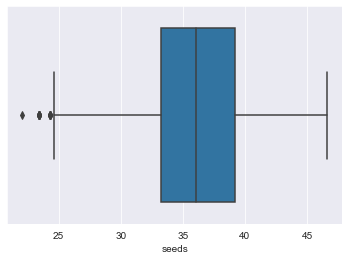

In [37]:
sns.boxplot(train['seeds'])

In [38]:
lower_limit = 0.06
upper_limit = 0.55
train['bumbles'] = train['bumbles'].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)
lower_limit = 0.0
upper_limit = 4.0
train['honeybee'] = train['honeybee'].apply(lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x)
lower_limit = 0.1
train['andrena'] = train['andrena'].apply(lambda x: lower_limit if x < lower_limit else x)
# lower_limit = 0.2
# df['osmia'] = df['osmia'].apply(lambda x: lower_limit if x < lower_limit else x)
# lower_limit = 15
# df['RainingDays'] = df['RainingDays'].apply(lambda x: lower_limit if x < lower_limit else x)
# lower_limit = 0.08
# df['AverageRainingDays'] = df['AverageRainingDays'].apply(lambda x: lower_limit if x < lower_limit else x)
# lower_limit = 0.31
# df['fruitset'] = df['fruitset'].apply(lambda x: lower_limit if x < lower_limit else x)
# lower_limit = 0.34
# df['fruitmass'] = df['fruitmass'].apply(lambda x: lower_limit if x < lower_limit else x)
# lower_limit = 25
# df['seeds'] = df['seeds'].apply(lambda x: lower_limit if x < lower_limit else x)
train.corr()

,clonesize,honeybee,bumbles,andrena,osmia,MinOfLowerTRange,RainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.716426,0.080489,0.065350,-0.007607,0.016026,0.165770,-0.406793,-0.377688,-0.396898,-0.382619
honeybee,0.716426,1.000000,0.081718,0.148675,0.107056,0.012011,0.111050,-0.254683,-0.253994,-0.267445,-0.243630
bumbles,0.080489,0.081718,1.000000,-0.166788,0.157285,-0.001781,-0.063651,0.160612,0.163565,0.176652,0.161484
andrena,0.065350,0.148675,-0.166788,1.000000,0.308767,-0.012942,-0.026699,0.073457,0.064192,0.062956,0.073816
osmia,-0.007607,0.107056,0.157285,0.308767,1.000000,-0.031486,-0.079874,0.209495,0.192210,0.200597,0.198264
MinOfLowerTRange,0.016026,0.012011,-0.001781,-0.012942,-0.031486,1.000000,0.011466,0.007909,0.146704,0.061360,-0.022319
RainingDays,0.165770,0.111050,-0.063651,-0.026699,-0.079874,0.011466,1.000000,-0.468066,-0.447033,-0.478818,-0.477191
fruitset,-0.406793,-0.254683,0.160612,0.073457,0.209495,0.007909,-0.468066,1.000000,0.936988,0.929654,0.885967
fruitmass,-0.377688,-0.253994,0.163565,0.064192,0.192210,0.146704,-0.447033,0.936988,1.000000,0.931646,0.826481
seeds,-0.396898,-0.267445,0.176652,0.062956,0.200597,0.061360,-0.478818,0.929654,0.931646,1.000000,0.868853


C:\Users\andyp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


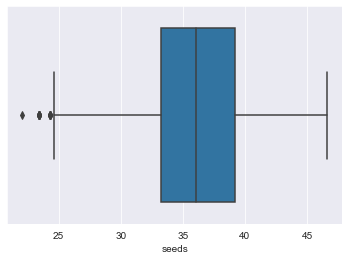

In [39]:
sns.boxplot(train['seeds'])

In [40]:
train.corr()

,clonesize,honeybee,bumbles,andrena,osmia,MinOfLowerTRange,RainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.716426,0.080489,0.065350,-0.007607,0.016026,0.165770,-0.406793,-0.377688,-0.396898,-0.382619
honeybee,0.716426,1.000000,0.081718,0.148675,0.107056,0.012011,0.111050,-0.254683,-0.253994,-0.267445,-0.243630
bumbles,0.080489,0.081718,1.000000,-0.166788,0.157285,-0.001781,-0.063651,0.160612,0.163565,0.176652,0.161484
andrena,0.065350,0.148675,-0.166788,1.000000,0.308767,-0.012942,-0.026699,0.073457,0.064192,0.062956,0.073816
osmia,-0.007607,0.107056,0.157285,0.308767,1.000000,-0.031486,-0.079874,0.209495,0.192210,0.200597,0.198264
MinOfLowerTRange,0.016026,0.012011,-0.001781,-0.012942,-0.031486,1.000000,0.011466,0.007909,0.146704,0.061360,-0.022319
RainingDays,0.165770,0.111050,-0.063651,-0.026699,-0.079874,0.011466,1.000000,-0.468066,-0.447033,-0.478818,-0.477191
fruitset,-0.406793,-0.254683,0.160612,0.073457,0.209495,0.007909,-0.468066,1.000000,0.936988,0.929654,0.885967
fruitmass,-0.377688,-0.253994,0.163565,0.064192,0.192210,0.146704,-0.447033,0.936988,1.000000,0.931646,0.826481
seeds,-0.396898,-0.267445,0.176652,0.062956,0.200597,0.061360,-0.478818,0.929654,0.931646,1.000000,0.868853


In [41]:
label = train['yield']
features = train.drop('yield',axis=1)
features

,clonesize,honeybee,bumbles,andrena,osmia,MinOfLowerTRange,RainingDays,fruitset,fruitmass,seeds
id,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,24.3,24.0,0.425011,0.417545,32.460887
1,25.0,0.50,0.25,0.50,0.50,24.3,24.0,0.444908,0.422051,33.858317
2,12.5,0.25,0.25,0.63,0.63,30.0,24.0,0.552927,0.470853,38.341781
3,12.5,0.25,0.25,0.63,0.50,27.0,24.0,0.565976,0.478137,39.467561
4,25.0,0.50,0.25,0.63,0.63,27.0,24.0,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.25,0.38,0.50,27.0,16.0,0.556302,0.476308,40.546480
15285,12.5,0.25,0.25,0.25,0.50,30.0,34.0,0.354413,0.388145,29.467434
15286,25.0,0.50,0.25,0.38,0.75,27.0,34.0,0.422548,0.416786,32.299059


In [42]:
from sklearn.model_selection import KFold
seed = 42
splits = 5
k = KFold(n_splits = splits, random_state = seed, shuffle = True)

np.random.seed(seed)

In [43]:
X_train, X_test, y_train, y_test=train_test_split(features,label,test_size=0.2,random_state=seed)
X_train

,clonesize,honeybee,bumbles,andrena,osmia,MinOfLowerTRange,RainingDays,fruitset,fruitmass,seeds
id,,,,,,,,,,
245,25.0,0.50,0.38,0.50,0.63,24.3,24.0,0.384981,0.399724,29.742583
3017,12.5,0.25,0.25,0.38,0.25,33.0,34.0,0.335530,0.376874,27.735098
8047,12.5,0.25,0.38,0.50,0.50,27.0,24.0,0.582483,0.488569,40.655498
14223,12.5,0.25,0.38,0.50,0.75,33.0,1.0,0.573428,0.466671,37.966864
13397,25.0,0.50,0.25,0.63,0.75,33.0,16.0,0.502398,0.453650,36.600113
...,...,...,...,...,...,...,...,...,...,...
5191,12.5,0.25,0.25,0.75,0.50,33.0,24.0,0.603525,0.497917,42.171765
13418,12.5,0.25,0.38,0.38,0.63,27.0,34.0,0.615612,0.510575,42.731736
5390,25.0,0.50,0.25,0.63,0.50,30.0,16.0,0.469632,0.434133,34.275163


In [44]:
# Create the individual models
catboost_model = CatBoostRegressor(random_state = seed, objective = 'MAE', verbose = 0)
lgbm_model = LGBMRegressor(random_state = seed, objective = 'mae')

# # Create the L1 regularized linear model
# lasso_model = Lasso(alpha=0.1)

# Create the VotingRegressor with L1 regularization
estimators = [('catboost', catboost_model), ('lgbm', lgbm_model)]
voting_regressor = VotingRegressor(estimators)

# Train the VotingRegressor
voting_regressor.fit(X_train, y_train)

# Evaluate the model
mse = mean_squared_error(y_test, voting_regressor.predict(X_test))
print("Mean squared error: ", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean squared error:  308069.7712158829
Root Mean Squared Error: 555.0403329631847


In [45]:
y_preds = voting_regressor.predict(test)
y_preds

array([4290.29690864, 5918.10991869, 7215.7734853 , ..., 6527.57722073,
       4436.54443228, 7271.59404515])

In [19]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_from_Kaggle_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

현재 날짜 및 시각 :  [6, 9, 14, 14, 20]


In [46]:
train

,clonesize,honeybee,bumbles,andrena,osmia,MinOfLowerTRange,RainingDays,fruitset,fruitmass,seeds,yield
id,,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,24.3,24.0,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,24.3,24.0,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,30.0,24.0,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,27.0,24.0,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,27.0,24.0,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.25,0.38,0.50,27.0,16.0,0.556302,0.476308,40.546480,7667.83619
15285,12.5,0.25,0.25,0.25,0.50,30.0,34.0,0.354413,0.388145,29.467434,3680.56025
15286,25.0,0.50,0.25,0.38,0.75,27.0,34.0,0.422548,0.416786,32.299059,4696.44394


In [47]:
def mae_scorer(preds, dtrain):
    labels = dtrain.get_label()
    return 'Mae' , mean_absolute_error(labels, preds)

In [48]:
train_2 = train.drop('yield' , axis=1)
train_2

,clonesize,honeybee,bumbles,andrena,osmia,MinOfLowerTRange,RainingDays,fruitset,fruitmass,seeds
id,,,,,,,,,,
0,25.0,0.50,0.25,0.75,0.50,24.3,24.0,0.425011,0.417545,32.460887
1,25.0,0.50,0.25,0.50,0.50,24.3,24.0,0.444908,0.422051,33.858317
2,12.5,0.25,0.25,0.63,0.63,30.0,24.0,0.552927,0.470853,38.341781
3,12.5,0.25,0.25,0.63,0.50,27.0,24.0,0.565976,0.478137,39.467561
4,25.0,0.50,0.25,0.63,0.63,27.0,24.0,0.579677,0.494165,40.484512
...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.25,0.38,0.50,27.0,16.0,0.556302,0.476308,40.546480
15285,12.5,0.25,0.25,0.25,0.50,30.0,34.0,0.354413,0.388145,29.467434
15286,25.0,0.50,0.25,0.38,0.75,27.0,34.0,0.422548,0.416786,32.299059


In [49]:
from scipy import sparse
from sklearn.model_selection import train_test_split
import xgboost as xgb


num_train = len(train) # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기
train_sprs = sparse.csr_matrix(train_2)
test_sprs = sparse.csr_matrix(test)
X= train_sprs # 0~num_train -1 행
X_test = test_sprs # num_train ~ 마지막 행

y = train['yield'].values



# 8:2 비율로 훈련 데이터, 검증 데이터 분리(베이지안 최적화 수행용)

X_train , X_valid , y_train , y_valid = train_test_split(X,y, test_size=0.2 , random_state=0)

# 베이지안 최적화용 데이터셋

bayes_dtrain = xgb.DMatrix(X_train , y_train)
bayes_dvalid = xgb.DMatrix(X_valid, y_valid)

In [50]:
# 베이지안 최적화를 위한 하이퍼파라미터 범위
param_bounds = {'max_depth' : (4 , 10) , # 개별 트리의 최대 깊이, 트리 깊이가 깊을수록 모델이 복잡해지고 과대적합 우려
                # 값이 클수록 깊이가 한 단계만 늘어나도 메모리 사용량이 급격히 많아진다.
                # 일반적으로 3~10 사이의 값을 주로 사용한다.

                'subsample' : (0.5 , 1), # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
                # 0~1 사이 값으로 설정할 수 있다.
                # 0.5 로 설정하면 전체 데이터의 50%를 사용해 트리를 생성

                'colsample_bytree' : (0.7 , 1.0), # 개별 트리를 훈련할 때 사용하는 피처 샘플링 비율
                # subsample 과 유사한 개념, subsample은 전체 데이터에서 얼마나 샘플링할지 나타내는 비율
                # colsample_bytree는 전체 피처에서 얼마나 샘플링할지 나타내는 비율
                # 값이 작을수록 과대적합 방지 효과

                'min_child_weight' : (5 , 10), # 과대적합 방지위한 값, 값이 클수록 과대적합 방지 효과가 있다.
                'gamma' : (8 , 11), # 말단 노드가 분할하기 위한 최소 손실 감소 값
                # 소실 감소가 gamma보다 크면 말단 노드를 분할
                # 값이 클수록 과대적합 방지 효과가 있다.

                'reg_alpha' : (7 , 9) , # L1 규제 조정 값 , 값이 클수록 과대적합 방지 효과
                'reg_lambda' : (1.1 , 1.5), # L2 규제 조정값 , 값이 클수록 과대적합 방지 효과
                'scale_pos_weight' : (1.4 , 1.6), # 뷸균형 데이터 가중치 조정 값 ,
                # 타깃값이 불균형할 때 양성 값에 scale_pos_weight 만큼 가중치를 줘서 균형을 맞춤(타깃값 1을 양성 값으로 간주)
                # 일반적으로 scale_pos_weight 값을 (음성 타깃값 개수 / 양성 타깃값 개수) 로 설정
                'learning_rate' : (0.02, 0.1)} # 학습률( 부스팅 스텝을 반복하면서 모델을 업데이트하는 데 사용되는 비율)


# 값이 고정된 하이퍼파라미터

fixed_params = {'objective' : 'reg:squarederror' ,# 훈련 목적 , binary : logistic( 확률값을 구하는 이진분류)
                # reg : squarederror (회귀 문제)
                # 소프트맥스 함수를 사용하는 다중분류에서는 multi : softmax 사용
                # 확률값을 구하는 다중분류에서는 'multi : softprob' 사용

                'random_state' : 1991} # 랜덤 시드값(코드를 반복 실행해도 같은 결과가 나오게 지정하는 값)

In [51]:
from sklearn.metrics import mean_absolute_error


def eval_function(max_depth ,learning_rate, subsample , colsample_bytree , min_child_weight , reg_alpha , gamma , reg_lambda , scale_pos_weight) :

    # 최적화하려는 평가지표(지니계수) 계산 함수

    # 베이지안 최적화를 수행할 하이퍼파라미터

    params = {'max_depth' : int(round(max_depth)) , # 개별 트리의 최대깊이
              'learning_rate' : learning_rate,
              'subsample' : subsample, # 개별 트리를 훈련할 때 사용할 데이터 샘플링 비율
              'colsample_bytree' : colsample_bytree , # 개별 트리를 훈련할때 사용하는 피처 샘플링
              'min_child_weight' :  # 과대적합 방지위한 값
                  min_child_weight,
              'gamma' : gamma, # 말단 노드가 분할하기 위한 최소 손실 감소 값
              'reg_alpha' : reg_alpha, # L1 규제 조정값
              'reg_lambda' : reg_lambda, # L2 규제 조정값
              'scale_pos_weight' : scale_pos_weight} # 불균형 데이터 가중치 조정값

    # 값이 고정된 하이퍼파라미터도 추가
    params.update(fixed_params)

    print('하이퍼파라미터 : ' , params)

    # XGBoost 모델 훈련 , train() 메서드의 하이퍼파라미터
    xgb_model = xgb.train(params = params , # XGBoost 모델의 하이퍼파라미터 목록 , 딕셔너리 타입으로 전달
                          dtrain = bayes_dtrain, # 훈련 데이터셋, xgboost.DMatrix 타입으로 전달
                          num_boost_round= 2000, # 부스팅 반복 횟수, 정수형 타입으로 전달
                          # num_boost_round 값이 클수록 성능이 좋아질 수 있으나 과대적합의 우려가 있다.
                          # num_boost_round 값이 작으면 반복 횟수가 줄어들어 훈련 시간이 짧아진다.
                          # 일반적으로 num_boost_round를 늘리면 learning_rate를 줄여야 한다.

                          evals = [(bayes_dvalid , ' bayes_dvalid')],
                          # 모델 성능 평가용 검증 데이터셋
                          # (DMatrix, 문자열) 쌍들을 원소로 갖는 리스트 타입으로 전달, 검증 데이터셋 이름을 원하는 대로 문자열로 정하면 된다.
                          maximize = True, # feval 평가지수가 높으면 좋은지 여부
                          feval = mae_scorer, # 검증용 평가지표, 사용자 정의 함수 형태
                          # evals를 활용해 모델 성능을 검증할 때 사용할 사용자 정의 평가지표 함수
                          # 예측값과 실제값을 파라미터로 전달받아, 평가지표명과 평가점수를 반환하는 함수이다.
                          early_stopping_rounds= 200,
                          # 조기종료 조건
                          # 모델은 기본적으로 num_boost_round만큼 훈련을 반복하며, 매 이터레이션마다 evals로 모델 성능을 평가하여 성능이 연속으로
                          # 좋아지지 않는다면 훈련을 중단하는데, 훈련 중단에 필요한 최소횟수가 early_stopping_rounds 이다. 즉 , early_stopping_rounds
                          # 동안 모델 성능이 좋아지지 않는다면 훈련을 중단한다.

                          # 과대적합 방지 효과

                          # 조기종료를 적용하기 위해서는 evals 에 검증 데이터가 하나 이상 있어야한다. 또한 evals에 검증 데이터가 여러 개라면 마지막 검증
                          # 데이터를 기준으로 조기종료 조건을 적용한다.


                          verbose_eval= False) # 성능 점수 로그 설정 값
    # True 로 설정하면 매 부스팅 스텝마다 평가점수르 출력
    # 출력값이 너무 많아지는 것을 방지하기위해 verbose_eval로 설정

    best_iter = xgb_model.best_iteration # 최적 반복횟수
    # 검증 데이터로 예측 수행
    preds = xgb_model.predict(bayes_dvalid , iteration_range=(0, best_iter))

    # 지니계수 계산
    mae_score = mean_absolute_error(y_valid, preds)
    print(f'Mae_score : {mae_score}\n')

    return -mae_score

In [52]:
%%time

from bayes_opt import BayesianOptimization

# 베이지안 최적화 객체 생성

optimizer = BayesianOptimization(f= eval_function, pbounds = param_bounds , random_state= 0)


# 베이지안 최적화 수행


optimizer.maximize(init_points= 3 , n_iter= 6)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | reg_alpha | reg_la... | scale_... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------
하이퍼파라미터 :  {'max_depth': 7, 'learning_rate': 0.06822107008573151, 'subsample': 0.9818313802505146, 'colsample_bytree': 0.8646440511781974, 'min_child_weight': 7.118273996694524, 'gamma': 10.14556809911726, 'reg_alpha': 8.291788226133312, 'reg_lambda': 1.275034884505077, 'scale_pos_weight': 1.578354600156416, 'objective': 'reg:squarederror', 'random_state': 1991}


C:\Users\andyp\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


Mae_score : 355.7284282198077

| 1         | -355.7    | 0.8646    | 10.15     | 0.06822   | 7.269     | 7.118     | 8.292     | 1.275     | 1.578     | 0.9818    |
하이퍼파라미터 :  {'max_depth': 7, 'learning_rate': 0.06231159358023236, 'subsample': 0.916309922773969, 'colsample_bytree': 0.8150324556477333, 'min_child_weight': 9.627983191463304, 'gamma': 10.375175114247995, 'reg_alpha': 7.142072116395774, 'reg_lambda': 1.1348517198806163, 'scale_pos_weight': 1.404043679488065, 'objective': 'reg:squarederror', 'random_state': 1991}


C:\Users\andyp\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


Mae_score : 355.63630715520765

| 2         | -355.6    | 0.815     | 10.38     | 0.06231   | 7.408     | 9.628     | 7.142     | 1.135     | 1.404     | 0.9163    |
하이퍼파라미터 :  {'max_depth': 9, 'learning_rate': 0.09828946737862113, 'subsample': 0.5716766437045232, 'colsample_bytree': 0.9334470252849552, 'min_child_weight': 7.30739681126466, 'gamma': 10.610036444740457, 'reg_alpha': 8.56105835257291, 'reg_lambda': 1.1473097703475734, 'scale_pos_weight': 1.5279842042655047, 'objective': 'reg:squarederror', 'random_state': 1991}


C:\Users\andyp\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


Mae_score : 370.9613368371383

| 3         | -371.0    | 0.9334    | 10.61     | 0.09829   | 8.795     | 7.307     | 8.561     | 1.147     | 1.528     | 0.5717    |
하이퍼파라미터 :  {'max_depth': 9, 'learning_rate': 0.09480552835375229, 'subsample': 0.9154444873061973, 'colsample_bytree': 0.7237366663815606, 'min_child_weight': 9.457964776710647, 'gamma': 8.254805197743558, 'reg_alpha': 8.3182857346322, 'reg_lambda': 1.1875047687160731, 'scale_pos_weight': 1.563558309161644, 'objective': 'reg:squarederror', 'random_state': 1991}


C:\Users\andyp\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


Mae_score : 363.1775835490671

| 4         | -363.2    | 0.7237    | 8.255     | 0.09481   | 8.864     | 9.458     | 8.318     | 1.188     | 1.564     | 0.9154    |
하이퍼파라미터 :  {'max_depth': 7, 'learning_rate': 0.09022454483344085, 'subsample': 0.7811193885366128, 'colsample_bytree': 0.900887345015532, 'min_child_weight': 9.727931100946655, 'gamma': 10.421904843224063, 'reg_alpha': 7.031252715096844, 'reg_lambda': 1.127609640299307, 'scale_pos_weight': 1.5032502291387093, 'objective': 'reg:squarederror', 'random_state': 1991}


C:\Users\andyp\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


Mae_score : 358.8605798217789

| 5         | -358.9    | 0.9009    | 10.42     | 0.09022   | 7.338     | 9.728     | 7.031     | 1.128     | 1.503     | 0.7811    |
하이퍼파라미터 :  {'max_depth': 8, 'learning_rate': 0.02, 'subsample': 1.0, 'colsample_bytree': 0.7, 'min_child_weight': 9.246291462462453, 'gamma': 10.21105915758621, 'reg_alpha': 7.537307043740475, 'reg_lambda': 1.1636236234509973, 'scale_pos_weight': 1.4, 'objective': 'reg:squarederror', 'random_state': 1991}


C:\Users\andyp\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


Mae_score : 363.0488988242928

| 6         | -363.0    | 0.7       | 10.21     | 0.02      | 7.628     | 9.246     | 7.537     | 1.164     | 1.4       | 1.0       |
하이퍼파라미터 :  {'max_depth': 5, 'learning_rate': 0.05528287278347259, 'subsample': 0.780924406810942, 'colsample_bytree': 0.7845696799538712, 'min_child_weight': 8.301241814450933, 'gamma': 9.058135516558217, 'reg_alpha': 7.836042669438813, 'reg_lambda': 1.333217415920183, 'scale_pos_weight': 1.5314334307917004, 'objective': 'reg:squarederror', 'random_state': 1991}


C:\Users\andyp\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


Mae_score : 355.17633064464616

| 7         | -355.2    | 0.7846    | 9.058     | 0.05528   | 5.072     | 8.301     | 7.836     | 1.333     | 1.531     | 0.7809    |
하이퍼파라미터 :  {'max_depth': 8, 'learning_rate': 0.03636748566053493, 'subsample': 0.6686820915509768, 'colsample_bytree': 0.8756518644781319, 'min_child_weight': 9.631041879942295, 'gamma': 10.33047027786976, 'reg_alpha': 7.271635324535415, 'reg_lambda': 1.10420691385065, 'scale_pos_weight': 1.4157661391137244, 'objective': 'reg:squarederror', 'random_state': 1991}


C:\Users\andyp\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


Mae_score : 353.5401724491601

| 8         | -353.5    | 0.8757    | 10.33     | 0.03637   | 7.567     | 9.631     | 7.272     | 1.104     | 1.416     | 0.6687    |
하이퍼파라미터 :  {'max_depth': 8, 'learning_rate': 0.02, 'subsample': 0.7890816799571522, 'colsample_bytree': 0.7491001035440062, 'min_child_weight': 9.92590993286214, 'gamma': 10.342253361464845, 'reg_alpha': 7.277545716582714, 'reg_lambda': 1.1, 'scale_pos_weight': 1.4, 'objective': 'reg:squarederror', 'random_state': 1991}


C:\Users\andyp\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


Mae_score : 363.28236893654963

| 9         | -363.3    | 0.7491    | 10.34     | 0.02      | 7.801     | 9.926     | 7.278     | 1.1       | 1.4       | 0.7891    |
Wall time: 24.2 s


In [53]:
# 평가함수 점수가 최대일 대 하이퍼파라미터
max_params = optimizer.max['params']
max_params
max_params['max_depth'] = int(round(max_params['max_depth']))

max_params.update(fixed_params)
max_params

{'colsample_bytree': 0.8756518644781319,
 'gamma': 10.33047027786976,
 'learning_rate': 0.03636748566053493,
 'max_depth': 8,
 'min_child_weight': 9.631041879942295,
 'reg_alpha': 7.271635324535415,
 'reg_lambda': 1.10420691385065,
 'scale_pos_weight': 1.4157661391137244,
 'subsample': 0.6686820915509768,
 'objective': 'reg:squarederror',
 'random_state': 1991}

In [54]:
from sklearn.model_selection import StratifiedKFold, KFold

# 층화 K 폴드 교차 검증기 생성
folds = KFold(n_splits= 5 , shuffle= True , random_state= 1991)

# OOF 방식으로 훈련된 모델로 검증 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_val_preds = np.zeros(X.shape[0])
# # OOF 방식으로 훈련된 모델로 테스트 데이터 타깃값을 예측한 확률을 담을 1차원 배열
oof_test_preds = np.zeros(X_test.shape[0])
# OOF 방식으로 훈련된 모델 훈련 , 검증 , 예측

for idx , (train_idx , valid_idx) in enumerate(folds.split(X,y)):
    # 각 폴드를 구분하는 문구 출력

    print('#' *40,  f'폴드 {idx+1} / 폴드 {folds.n_splits}' , '#'*40)


    # 훈련용 데이터, 검증용 데이터 설정
    X_train , y_train = X[train_idx] , y[train_idx]
    X_valid , y_valid = X[valid_idx] , y[valid_idx]

    #XGBoost 전용 데이터셋 생성

    dtrain = xgb.DMatrix(X_train , y_train)
    dvalid = xgb.DMatrix(X_valid , y_valid)
    dtest = xgb.DMatrix(X_test)

    #XGBoost 모델 훈련
    xgb_model = xgb.train(params = max_params,
                          dtrain = dtrain,
                          num_boost_round = 2000,
                          evals = [(dvalid , 'valid')],
                          maximize = True,
                          feval = mae_scorer,
                          early_stopping_rounds = 200,
                          verbose_eval = 100)

    # 모델 성능이 가장 좋을 때의 부스팅 반복 횟수 저장
    best_iter= xgb_model.best_iteration
    # 테스트 데이터를 활용해 OOF 예측

    oof_test_preds += xgb_model.predict(dtest, iteration_range = (0 , best_iter))/ folds.n_splits

    oof_test_preds_xgb = oof_test_preds
    # 모델 성능 평가를 위한 검증 데이터 타깃값 예측
    oof_val_preds[valid_idx] += xgb_model.predict(dvalid , iteration_range=(0, best_iter))


    # 검증 데이터 예측 확률에 대한 정규화 지니계수
    mae_score = mean_absolute_error(y_valid , oof_val_preds[valid_idx])
    print(f'폴드 {idx+1}  MAE : {mae_score}\n')

######################################## 폴드 1 / 폴드 5 ########################################
[0]	valid-rmse:5945.62804	valid-Mae:5805.32129


C:\Users\andyp\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[100]	valid-rmse:548.26903	valid-Mae:366.01141
[199]	valid-rmse:529.86753	valid-Mae:344.50790
폴드 1  MAE : 344.493129539042

######################################## 폴드 2 / 폴드 5 ########################################
[0]	valid-rmse:5933.47382	valid-Mae:5790.25244


C:\Users\andyp\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[100]	valid-rmse:604.36342	valid-Mae:385.71432
[199]	valid-rmse:582.26062	valid-Mae:359.00229
폴드 2  MAE : 359.1452280858098

######################################## 폴드 3 / 폴드 5 ########################################
[0]	valid-rmse:5957.35363	valid-Mae:5810.45703


C:\Users\andyp\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[100]	valid-rmse:596.30128	valid-Mae:382.21753
[200]	valid-rmse:572.63650	valid-Mae:357.94775
폴드 3  MAE : 357.9477871383461

######################################## 폴드 4 / 폴드 5 ########################################
[0]	valid-rmse:5955.55765	valid-Mae:5814.34277


C:\Users\andyp\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[100]	valid-rmse:605.08281	valid-Mae:383.95645
[199]	valid-rmse:586.94500	valid-Mae:360.61191
폴드 4  MAE : 360.68786332138546

######################################## 폴드 5 / 폴드 5 ########################################
[0]	valid-rmse:5956.55394	valid-Mae:5809.38184


C:\Users\andyp\anaconda3\lib\site-packages\xgboost\training.py:39: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


[100]	valid-rmse:558.72403	valid-Mae:366.31699
[199]	valid-rmse:541.09589	valid-Mae:343.89902
폴드 5  MAE : 343.9678172092738



In [55]:
y_preds = oof_test_preds
y_preds

array([4268.87609863, 6203.63574219, 7198.43139648, ..., 6485.14709473,
       4415.43823242, 7262.14294434])

In [56]:
from sklearn.model_selection import train_test_split


num_train = len(train)  # 훈련 데이터 개수

# 훈련 데이터와 테스트 데이터 나누기

X = train_2  # 0~num_train -1 행
X_test = test  # num_train ~ 마지막 행

y = train['yield'].values

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
from sklearn.metrics import mean_absolute_error


dvalid = xgb.DMatrix(X_valid)

y_pred = xgb_model.predict(dvalid)

# MAE 계산
mae = mean_absolute_error(y_valid, y_pred)
print("MAE:", mae)

MAE: 316.3754074238166


In [58]:
import datetime

# 현재 날짜와 시각 구하기
now = datetime.datetime.now()
date_list = [now.month, now.day, now.hour, now.minute, now.second]
# 현재 날짜와 시각 출력하기
print("현재 날짜 및 시각 : ", date_list)

# 제출 파일 생성

submission['yield'] = y_preds
submission.to_csv(f'submission_from_Kaggle_{date_list[0]}_{date_list[1]}_{date_list[2]}_{date_list[3]}_{date_list[4]}.csv')

현재 날짜 및 시각 :  [6, 9, 14, 27, 26]
